# 3. 신경망

- 퍼셉트론: 가중치를 설정하는 작업(원하는 결과를 출력하도록 가중치 값을 적절히 정하는 작업)은 여전히 사람이 수동으로 한다
- 신경망: 가중치 매개 변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 있다

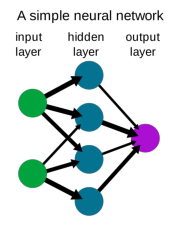

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
import requests
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Neural_network_example.svg/1200px-Neural_network_example.svg.png"

im = Image.open(requests.get(url, stream=True).raw)

plt.imshow(im)
plt.axis('off')
plt.show()

- 입력층/은닉층/출력층으로 구성
- 가중치를 갖는 층의 개수: 입력층, 은닉층, 출력층의 합계 - 1
<br><br>>> 위 그림은 2층 신경망이다.

## 3.1.3 활성화 함수의 등장
- 활성화 함수: 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할

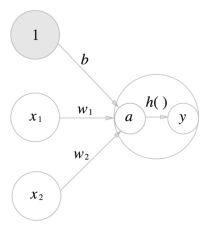

In [8]:
url = "https://user-images.githubusercontent.com/44635266/75087712-2355e880-5587-11ea-8f43-6c54e4ec0c7f.png"

im = Image.open(requests.get(url, stream=True).raw)

plt.imshow(im)
plt.axis('off')
plt.show()

- h: 활성화 함수
- a: 입력신호x가중치 + 편향

- 단순 퍼셉트론: 단층 네트워크에서 계단 함수(임계값을 경계로 출력이 바뀌는 함수)를 활성화 함수로 사용한 모델
- 다층 퍼셉트론: 신경망(여러 층으로 구성되고 시그모이드 함수 등의 매끈한 활성화 함수를 사용하는 네트워크)

## 3.2.1 시그모이드 함수

$$h(x) = \frac{1}{1+exp(-x)}$$<br>
$$h(x) = \frac{1}{1+e^{-x}}\$$<br>
퍼셉트론과 신경망의 주된 차이는 활성화 함수다.

## 3.2.2 계단함수 구현하기(퍼셉트론에서 쓰임)

In [9]:
#실수(부동소수점)용
def step_function(x):
    if x>0:
        return 1
    else:
        return 0

In [10]:
#전체용
def step_function(x):
    y = x>0
    return y.astype(np.int)

In [12]:
#활용
x = np.array([-1.0,1.0,2.0])
print("x:",x)
y = x>0
print("y:",y)

x: [-1.  1.  2.]
y: [False  True  True]


In [13]:
y = y.astype(np.int)
y

<ipython-input-13-9f962d9dbdc0>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


array([0, 1, 1])

## 3.2.3 계단 함수의 그래프

<ipython-input-14-e4c68f0aba1c>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x>0, dtype = np.int)


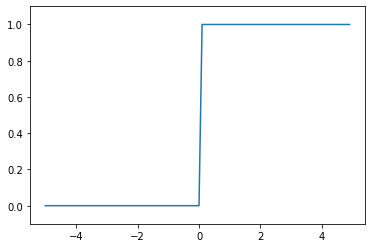

In [14]:
def step_function(x):
    return np.array(x>0, dtype = np.int)
x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

## 3.2.4 시그모이드 함수 구현하기(신경망에서 활용하는 활성화 함수 #1)

In [17]:
def sigmoid(x):#시그모이드 함수
    return 1/(1+np.exp(-x))

In [19]:
x = np.array([-1.0,1.0,2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

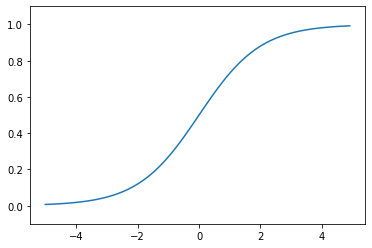

In [21]:
#시그모이드 함수 그래프
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

<ipython-input-14-e4c68f0aba1c>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x>0, dtype = np.int)


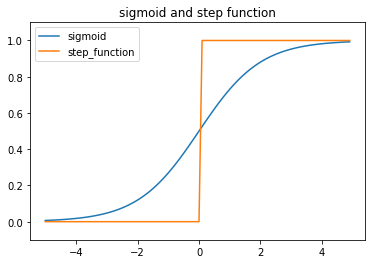

In [28]:
## 3.2.5 시그모이드 함수와 계단 함수 비교
#시그모이드 함수 그래프
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
y2 = step_function(x)
plt.plot(x,y)
plt.plot(x,y2)
plt.legend(['sigmoid','step_function'])
plt.title("sigmoid and step function")
plt.ylim(-0.1,1.1)
plt.show()

- 계단 함수: 0 과 1 중 하나의 값을 가짐
- 시그모이드: 연속적인 실수

<br>
<b>즉, 계단 함수와 시그모이드 함수는 입력이 중요하면 큰 값을 출력하고 입력이 중요하지 않으면 작은 값을 출력한다.</b>
<br>
그리고 아무리 입력이 작거나 커도 출력은 0에서 1사이다

## 3.2.6 비선형 함수<br>
- 선형 함수: 입력의 상수 배만큼 변하는 함수
- 비선형 함수: 직선 1개로는 그릴 수 없는 함수
<br><br>

<b>신경망에서는 반드시 활성화 함수로 비선형 함수를 사용해야 한다.</b>

## 3.2.7 ReLU 함수(신경망에서 활용하는 활성화 함수 #2)<br>
- 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수

<br>

$$h(x)=\begin{cases} x & (x > 0) \\ 0 & (x \le 0) \end{cases}$$

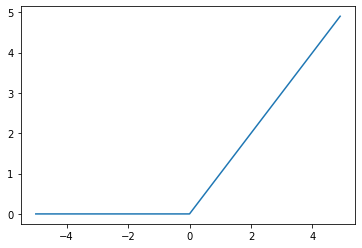

In [29]:
def relu(x):
    return np.maximum(0,x)

x = np.arange(-5.0,5.0,0.1)
y = relu(x)
plt.plot(x,y)

## 3.3 다차원 배열의 계산

In [32]:
A = np.array([1,2,3,4])
print("A:",A)
print("dim:",np.ndim(A))#차원
print("shape:",A.shape)#배열의 형상(원소 4개)
print("튜플 형태:",A.shape[0])

A: [1 2 3 4]
dim: 1
shape: (4,)
튜플 형태: 4


In [33]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [35]:
np.ndim(B)

2

In [36]:
B.shape

(3, 2)

In [37]:
B.shape[0]

3

In [38]:
B.shape[1]

2

## 3.3.2 행렬의 곱
- 벡터: 1차원 배열, 행렬: 2차원 배열
- np.dot(A,B) $\neq$ np.dot(B,A)
- <b>두 행렬의 대응하는 차원의 원소 수를 일치시켜야 함</b>

In [39]:
A = np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [40]:
B = np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [41]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [42]:
A = np.array([[1,2,3],[4,5,6]])
A.shape

(2, 3)

In [43]:
B = np.array([[1,2],[3,4],[5,6]])
B.shape

(3, 2)

In [44]:
np.dot(A,B)#행렬 곱

array([[22, 28],
       [49, 64]])

## 3.4 3층 신경망 구현하기

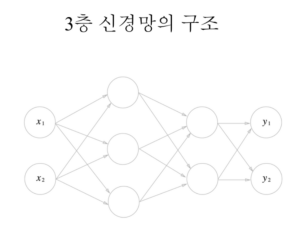

In [47]:
url = "https://blog.kakaocdn.net/dn/bWGnEd/btqIOaGb6vp/PARvhbnhBa0VkpZ85wb8q0/img.png"

im = Image.open(requests.get(url, stream=True).raw)

plt.imshow(im)
plt.axis('off')
plt.show()

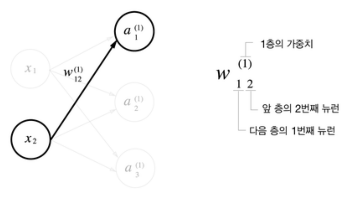

In [48]:
url = "https://mblogthumb-phinf.pstatic.net/MjAxODA2MTBfNzIg/MDAxNTI4NjEzNzA2MzM0.j9QOoSA1XXHdyvrUWy0ZP_f_nWneMFSd1xIFpSRDxHsg.XXxHvb4p00Wu9Kzn_n-nB_lKfE2iRFVax14IwQhUejcg.PNG.ssdyka/fig_3-16.png?type=w2"

im = Image.open(requests.get(url, stream=True).raw)

plt.imshow(im)
plt.axis('off')
plt.show()

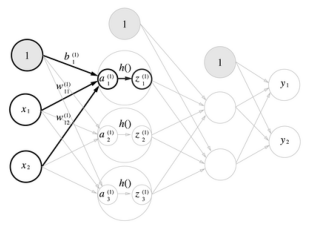

In [50]:
url = "https://mblogthumb-phinf.pstatic.net/MjAxODA2MTBfMTUy/MDAxNTI4NjEzNzA3MTgy.iInlQtedOrR3cr83cHlHh5iBC97Rd3CAn8lsfil2pJwg.VY7Bft0dgHkae7sJ4UrgO9CchUygWMF7DhqdSlMvzm0g.PNG.ssdyka/fig_3-18.png?type=w2"
im = Image.open(requests.get(url, stream=True).raw)

plt.imshow(im)
plt.axis('off')
plt.show()

- X: 입력신호 <br><br>($x_1$,$x_2$)<br><br>
- W1: 1층 가중치 
\begin{pmatrix}
w_{11}(1) & w_{21}(1) & w_{31}(1)\\
w_{12}(1) & w_{22}(1) & w_{32}(1)
\end{pmatrix}
- B1: 1층 편향  <br><br>($b_1(1)$ $b_2(1)$ $b_3(1)$)<br><br>
- a: 가중 신호와 편향의 총합
- z: 활성화 함수로 변환된 신호 (z=h(a))

In [54]:
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X,W1)+B1
print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


In [55]:
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [57]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

print(Z1.shape)
print(W2.shape)
print(B1.shape)

A2 = np.dot(Z1,W2) + B2#1층의 출력 Z1이 2층의 입력이 됨
Z2 = sigmoid(A2)

(3,)
(3, 2)
(3,)


In [58]:
def identity_function(x):#항등함수
    return x
W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3)+B3
Y = identity_function(A3)

<b>출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정한다.<br>
- 분류: 데이터가 어느 클래스에 속할지
- 회귀: 입력데이터에서 (연속적인) 수치 예측<br>
    <br>
- 회귀: 항등함수
- 2 클래스 분류: 시그모이드 함수
- 다중 클래스 분류: 소프트맥스 함수
</b>

## 3.4.3 구현 정리

In [60]:
#신경망: 가중치와 편향을 초기화하고 딕셔너리 변수 network에 저장한다
def init_network():#가중치와 편향 초기화
    network= {}#딕셔너리
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])#1층 가중치
    network['b1'] = np.array([0.1,0.2,0.3])#1층 편향
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])#2층 가중치
    network['b2'] = np.array([0.1,0.2])#2층 편향
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])#3층 가중치
    network['b3'] = np.array([0.1,0.2])#3층 편향
    
    return network

In [61]:
#순방향 처리: 입력신호를 출력으로 변환하는 처리과정
def forward(network, x):
    W1, W2, W3 = network['W1'],network['W2'],network['W3']
    b1, b2, b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x,W1)
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)
    y = identity_function(a3)
    
    return y

In [62]:
network = init_network()
x = np.array([1.0,0.5])
y = forward(network, x)
print(y)

[0.20357088 0.46668496]


## 3.5.1 항등함수와 소프트맥스 함수 구현하기

- 항등 함수: 회귀에서 사용, 입력 그대로 출력
- 소프트맥스 함수: 분류에서 사용

$$y_k = \frac{exp(a_k)}{\sum_{i=1}^{n} exp({a_i})}\$$<br>

$$y_k = \frac{입력 신호 a_k의 지수 함수}{모든 입력 신호의 지수함수의 합}\$$


<br>
- n: 출력층의 뉴런 수<br>
- $a_k$: 입력신호

In [63]:
def soft_max(a):
    exp_a = np.exp(a)#지수함수 (분자)
    sum_exp_a = np.sum(exp_a)#지수함수의 합(분모)
    y = exp_a/sum_exp_a#softmax
    return y

## 3.5.2 소프트맥스 함수 구현 시 주의점
- 오버플로우 문제 발생: 너무 큰 값은 표현할 수 없다.
- 오버플로우를 막을 목적으로 입력 신호 중 최대값(np.max(a))을 이용한다.

In [68]:
a = np.array([1010,1000,990])#입력
np.exp(a)/np.sum(np.exp(a))#오버플로우 문제: 제대로 계산되지 않음(not a number)

<ipython-input-68-9a619ea4e21d>:2: RuntimeWarning: overflow encountered in exp
  np.exp(a)/np.sum(np.exp(a))#오버플로우 문제: 제대로 계산되지 않음(not a number)
<ipython-input-68-9a619ea4e21d>:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a)/np.sum(np.exp(a))#오버플로우 문제: 제대로 계산되지 않음(not a number)


array([nan, nan, nan])

In [70]:
c = np.max(a)#입력 주 최대
a-c

array([  0, -10, -20])

In [72]:
np.exp(a-c)/np.sum(np.exp(a-c))#오버플로우 해결한 소프트맥스

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [73]:
def softmax(a):
    c = np.max(a)
    y = np.exp(a-c)/np.sum(np.exp(a-c))
    return y

In [74]:
softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [75]:
#책 버전
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a =  np.sum(exp_a)
    y = exp_a/sum_exp_a
    return y

In [77]:
softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

## 3.5.3 소프트맥스 함수의 특징

<b>소프트맥스 함수의 출력을 '확률'로 해석할 수 있다</b>
- 소프트맥스 함수를 적용해도 각 원소의 대소관계는 변하지 않는다.
- 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략해도 된다.
- 지수 함수 계산에 드는 자원 낭비를 줄이고자 출력층의 소프트맥스를 생략하는 것이 일반적이다

In [83]:
y = softmax(a)
print(y)
print(np.sum(y))#소프트맥수 함수 출력의 총합이 1이다

[9.99954600e-01 4.53978686e-05 2.06106005e-09]
1.0


<b>기계 학습의 문제풀이: 학습 -> 추론</b>
- 학습 단계: 모델을 학습(직업 훈련을 받음); 훈련 데이터(학습 데이터)를 사용해 가중치 매개변수를 학습
- 추론 단계: 앞서 학습한 모델로 미지의 데이터에 대해서 추론(분류)을 수행한다; 매개변수를 사용하여 입력데이터를 분류

<b>추론 단계에서는 출력층의 소프트 맥스를 생략하지만 신경망을 학습시킬 땐 출력층에서 소프트맥스 함수를 사용함</b>

## 3.6 손글씨 숫자 인식

- normalize: 0.0~1.0 사이의 값으로 정규화할지 정함
- flatten: 1차원 배열로 만들지 결정
- one_hot_label: 원-핫 인코딩 형태로 저장할지 정함

In [144]:
import sys, os
sys.path.append(os.pardir)#부모 디렉터리의 파일을 가져올 수 있도록 설정

from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize = False)#(훈련이미지, 훈련레이블)(시험이미지, 시험레이블)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


- 이미지 표시에는 PIL(Python Image Library) 모듈 사용

In [145]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

In [146]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))#PIL용 데이터 객체로 변환
    pil_img.show()
img = x_train[0]
label = t_train[0]
print(label)

5


In [147]:
print(img.shape)

(784,)


In [148]:
img = img.reshape(28,28)#1차원에서 원래 이미지의 모양으로 변형

In [124]:
print(img.shape)

(28, 28)


In [125]:
img_show(img)#5이어야 함

In [149]:
def get_data():#테스트 데이터 반환
    #정규화, 1차원 배열로 변환
    (x_train, t_train),(x_test, t_test) = load_mnist(normalize=True, flatten = True, one_hot_label=False)
    return x_test, t_test
    

In [150]:
def init_network():#신경망 초기화(가중치, 편향)
    with open("sample_weight.pkl",'rb') as f:#sample_weight.pkl: 학습된 가중치 매개변수 저장됨
                                                #(가중치와 편향 매개변수가 딕셔너리 변수로 저장됨)
        network = pickle.load(f)
    return network

In [151]:
def predict(network, x):#추론
    W1, W2, W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x,W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+b3
    y = softmax(a3)
    return y

In [152]:
def predict2(network, x):#추론
    W1, W2, W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x,W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)+b2
    z2 = relu(a2)
    a3 = np.dot(z2,W3)+b3
    y = softmax(a3)
    return y

In [153]:
def predict3(network, x):#추론
    W1, W2, W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x,W1)+b1
    z1 = relu(a1)
    a2 = np.dot(z1,W2)+b2
    z2 = relu(a2)
    a3 = np.dot(z2,W3)+b3
    y = softmax(a3)
    return y

In [155]:
import pickle
#predict
x,t = get_data()#test data
network = init_network()

accuracy_cnt = 0#정답 횟수
for i in range(len(x)):
    y = predict(network,x[i])
    p = np.argmax(y)#확률이 가장 높은 원소의 인덱스를 얻는다
    #p는 추론 값, t[i]는 정답
    if p == t[i]:#정답일 때
        accuracy_cnt += 1
ac = float(accuracy_cnt)/len(x)
print("accuracy:",ac)

accuracy: 0.9352


In [156]:
#predict2
x,t = get_data()#test data
network = init_network()

accuracy_cnt = 0#정답 횟수
for i in range(len(x)):
    y = predict2(network,x[i])
    p = np.argmax(y)#확률이 가장 높은 원소의 인덱스를 얻는다
    if p == t[i]:
        accuracy_cnt += 1#정답횟수 높임
ac = float(accuracy_cnt)/len(x)
print("accuracy:",ac)

accuracy: 0.9151


In [157]:
#predict3
x,t = get_data()#test data
network = init_network()

accuracy_cnt = 0#정답 횟수
for i in range(len(x)):
    y = predict3(network,x[i])
    p = np.argmax(y)#확률이 가장 높은 원소의 인덱스를 얻는다
    if p == t[i]:
        accuracy_cnt += 1
ac = float(accuracy_cnt)/len(x)
print("accuracy:",ac)

accuracy: 0.8415


<b>전처리</b>: 신경망의 데이터에 특정 변화를 가하는 것
- 전처리를 통해 식별 능력을 개선하고 학습 속도를 높이는 등의 사례가 많이 제시됨.
- 정규화: 데이터를 0.0~1.0 범위로 변환하는 처리
- 데이터 전체 평균과 표준편차를 이용하여 데이터들이 0을 중심으로 분포하도록 이동하거나
- 데이터의 확산 범위를 제한하는 정규화를 수행
- 데이터 백색화: 전체 데이터를 균일하게 분포시키기

## 3.6.3 배치 처리

In [158]:
x, q = get_data()
network = init_network()
W1, W2, W3 = network['W1'],network['W2'],network['W3']

In [161]:
x.shape#x_test

(10000, 784)

In [160]:
q.shape

(10000,)

In [163]:
x[0].shape#1 x 784(이미지 1개)

(784,)

In [164]:
W1.shape

(784, 50)

In [165]:
W2.shape

(50, 100)

In [166]:
W3.shape

(100, 10)

<b>배치</b>: 하나로 묶은 입력 데이터<br>
배치 처리는 컴퓨터로 계산할 때 큰 이점을 준다. 이미지 1장당 처리 시간을 대폭 줄여준다

In [168]:
#배치크기 100
x,t = get_data()#test_data
network = init_network()
batch_size = 100 #배치 크기
accuracy_cnt = 0
for i in range(0,len(x),batch_size):#batch_size 간격으로 반복문 i 증가
    x_batch = x[i:i+batch_size]#x[0:100], x[100:200]...
    y_batch = predict(network,x_batch)
    p = np.argmax(y_batch, axis=1)#1번째 차원을 구성하는 각 원소에서 1번째 차원을 축으로 최대값의 인덱스를 찾도록 함
    accuracy_cnt += np.sum(p==t[i:i+batch_size])

print("accuracy with batch size 100:",float(accuracy_cnt)/len(x))
    

accuracy with batch size 100: 0.9352


- range(0, len(x), batch_size) 부연 설명:

In [169]:
print(list(range(0,10)))
print(list(range(0,10,3)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 3, 6, 9]


- np.argmax(y_batch, axis=1) 부연 설명:

In [171]:
x = np.array([[0.1,0.8,0.1],[0.3,0.1,0.6],[0.2,0.5,0.3],[0.8,0.1,0.1]])
y = np.argmax(x, axis=1)#리스트 내에서 큰 값 찾게 함
print(y)

[1 2 1 0]


In [172]:
y2 =  np.argmax(x, axis = 0)
print(y2)

[3 0 1]


In [173]:
y3 =  np.argmax(x, axis = 2)
print(y3)

AxisError: axis 2 is out of bounds for array of dimension 2

- np.sum(p == t[i:i+batch_size]) 부연설명

In [174]:
y = np.array([1,2,1,0])
t = np.array([1,2,0,0])
np.sum(y==t)

3

- 배치크기에 의해 정확도가 바뀔까? -> 안 바뀜

In [175]:
#배치크기 50
x,t = get_data()#test_data
network = init_network()
batch_size = 50 #배치 크기
accuracy_cnt = 0
for i in range(0,len(x),batch_size):#batch_size 간격으로 반복문 i 증가
    x_batch = x[i:i+batch_size]#x[0:100], x[100:200]...
    y_batch = predict(network,x_batch)
    p = np.argmax(y_batch, axis=1)#1번째 차원을 구성하는 각 원소에서 1번째 차원을 축으로 최대값의 인덱스를 찾도록 함
    accuracy_cnt += np.sum(p==t[i:i+batch_size])

print("accuracy with batch size 100:",float(accuracy_cnt)/len(x))
    

accuracy with batch size 100: 0.9352


latex 참고:
https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd